![BTS](img/Logo-BTS.jpg)

# Session 8: Basic time datatypes

### Juan Luis Cano Rodríguez <juan.cano@bts.tech> - Data Science Foundations (2018-10-30)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/08-Time-Series.ipynb)

## Exercise 1: Bike usage

1. Download the Fremont Bridge bicycle counter dataset from https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
2. Load it in pandas
3. Create a new column `Total` that contains the sum of trips in the `East` and `West` sidewalks
4. Plot the weekly sum of East, West and Total trips in the same axes
5. Plot the 30 day rolling mean of East, West and Total trips in the same axes
  * Optional: Plot the 50 day rolling mean of East, West and Total trips in the same axes using a Gaussian window with `std=10` (standard deviation)
6. Plot the evolution of East, West and Total trips by hour of the day
7. Plot the evolution of East, West and Total trips by weekday
8. Create a new column `Weekend` that is `True` for weekends and `False` for weekdays
9. Plot the hourly evolution of East, West and Total separating by weekday and weekend

In [4]:
import pandas as pd

In [11]:
data = pd.read_csv(
    "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD",
    index_col="Date",
    parse_dates=["Date"],
).rename({
    'Fremont Bridge East Sidewalk': 'East',
    'Fremont Bridge West Sidewalk': 'West',
}, axis=1)
data.head()

,East,West
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [12]:
data['Total'] = data["East"] + data["West"]
data.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


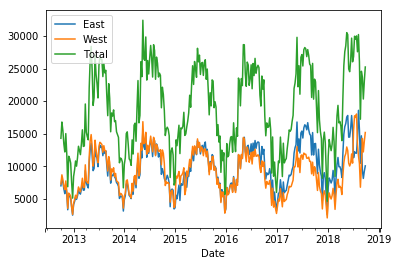

In [17]:
data.resample("W").sum().plot()

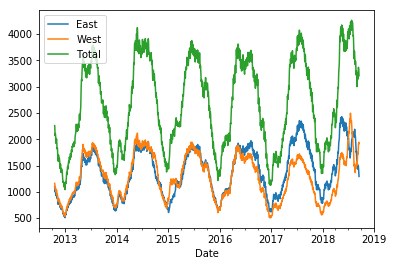

In [23]:
data.resample("1D").sum().rolling(30, center=True).mean().plot()

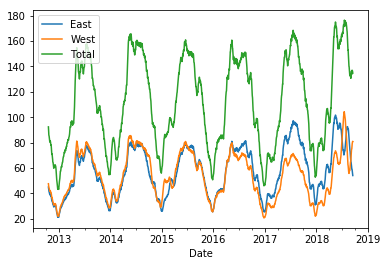

In [33]:
res_m = data.resample("1D").mean().rolling(30, center=True, win_type="gaussian").mean(std=10)
res_m.plot()

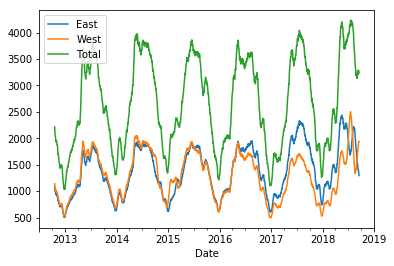

In [34]:
res_s = data.resample("1D").sum().rolling(30, center=True, win_type="gaussian").mean(std=10)
res_s.plot()

In [37]:
#(res_s / res_m).plot()  # ????????????